In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


Создаим импровидированую подель для оценки домов и недвижимости , банально но все же
таблица будет состоять из :
- Площади
- Отдаление от метро
- число комнат

In [56]:
house_S = np.random.randint(14,60,size=20)
house_m = np.random.randint(5,60,size=20)
house_r = np.random.randint(1,5,size=20)
noise = np.random.normal(0,10_000, size=house_S.shape)
house_price = house_S * 10_000 + noise


Обьеденяем все значеие в датайрем чтобы было проще работать

In [57]:
df_house = pd.DataFrame({
    'Площадь Домов' : house_S,
    'Расстояние от метро' :  house_m,
    'Кол-во комнат' : house_r,
    'Цена дома' : house_price
})
df_house.head()

,Площадь Домов,Расстояние от метро,Кол-во комнат,Цена дома
0,25,20,3,251450.604970
1,15,37,1,138428.885189
2,37,23,1,378138.391191
3,34,53,2,331331.892581
4,17,37,2,180253.348593


Теперь обучем модель линейной регресии на на ших данных чтобы предсказать цену

In [58]:
y = df_house['Цена дома']
X = df_house.drop(columns =['Цена дома'])
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

содаем саму модель

In [59]:
model = LinearRegression()

Обучаем модель

In [60]:
model.fit(X_train, y_train)

LinearRegression()

Делаем предсказание на тестовой выборке

In [61]:
y_pred = model.predict(X_test)
y_pred

array([248919.20897053, 365617.53855884, 579111.38407788, 161071.48546855])

Оцениваем модель

In [62]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


In [63]:

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 150483533.38047758
R^2 Score: 0.9945601735872401


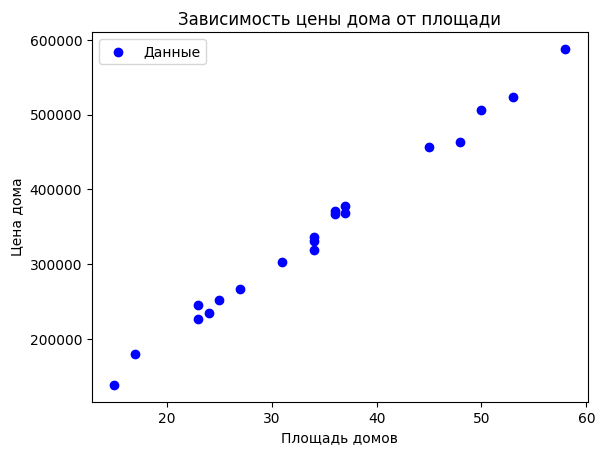

In [64]:
plt.scatter(X['Площадь Домов'], y, color='blue', label='Данные')  # Используем один признак
plt.xlabel('Площадь домов')
plt.ylabel('Цена дома')
plt.title('Зависимость цены дома от площади')
plt.legend()
plt.show()
